# Coordinate Transformations

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt

In [8]:
M = np.array([[2, 1], [-1, 2]])

In [47]:
theta = np.linspace(0, 2 * math.pi, 100)
x = np.cos(theta)
y = np.sin(theta)
xy = np.array([[i, j] for (i, j) in zip(x, y)])

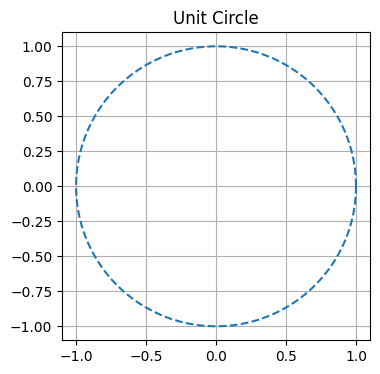

In [54]:
plt.gca().set_aspect("equal")

plt.title("Unit Circle")
plt.grid()

plt.plot(x, y, linestyle='dashed')

plt.show()

In [44]:
transformed = xy @ M

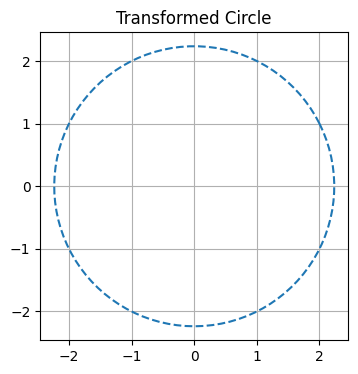

In [159]:
plt.gca().set_aspect("equal")

plt.title("Transformed Circle")
plt.grid()

plt.plot(transformed[:, 0], transformed[:, 1], linestyle='dashed')

plt.show()

In [160]:
def plot_transformed(transform):
    plt.gca().set_aspect("equal")
    plt.title("Unit circle vs Transformed")
    plt.grid()
    transformed = xy @ transform
    plt.plot(x, y, linestyle='dashed', label='Unit Circle')
    plt.plot(transformed[:, 0], transformed[:, 1], linestyle='dashed', label='Transformed Point')
    a1 = [0, 1]
    a2 = [1, 0]
    plt.scatter(a1[0], a1[1], color='red')
    plt.scatter(a2[0], a2[1], color='green')
    u = a1 @ transform
    v = a2 @ transform
    plt.scatter(u[0], u[1], color = 'red')
    plt.scatter(v[0], v[1], color = 'green')
    return plt.show()

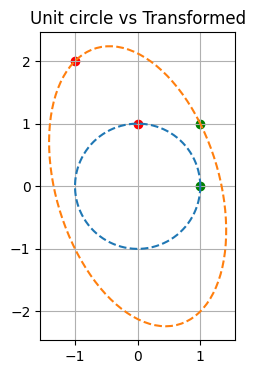

In [161]:
plot_transformed(np.array([[1, 1], [-1, 2]]))

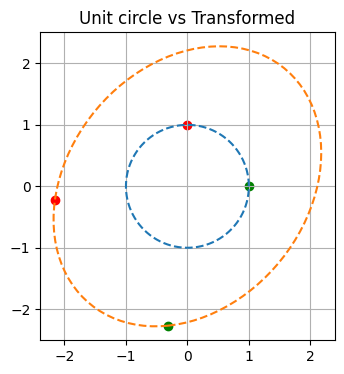

[[-0.30826157 -2.26734969]
 [-2.15615175 -0.22624078]]


In [237]:
matrix = np.random.normal(0, 1, (2, 2)) 
plot_transformed(matrix)
print(matrix)

For a matrix $M$ and some points $x$ distributed in a circle, $Mx$ turns the circle into a rotated ellipse. Larger values in the matrix make the ellipse larger, and vice versa. All four values in the matrix being positive makes the ellipse slant to the right, and four negative values does the same.

In [238]:
matrix = np.random.normal(0, 1, (2, 2))
symmatrix = matrix * matrix.T

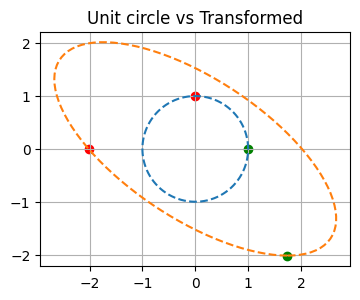

In [239]:
plot_transformed(symmatrix)

In [240]:
U, S, VT = np.linalg.svd(symmatrix)
newpoints = xy @ symmatrix

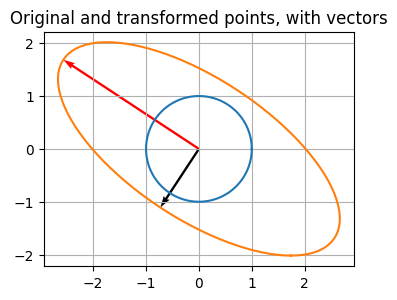

In [241]:
plt.gca().set_aspect("equal")
plt.plot(xy[:,0], xy[:,1])
plt.plot(newpoints[:,0], newpoints[:,1])
plt.quiver(0, 0, VT[0][0], VT[0][1], scale=1/S[0], scale_units = 'xy', color='red')
plt.quiver(0, 0, VT[1][0], VT[1][1], scale=1/S[1], scale_units = 'xy')

plt.title("Original and transformed points, with vectors")
plt.grid()
plt.show()

The vectors are aligned along the axes of the ellipse, and their length is determined by $\Sigma$. The first vector corresponds to the major axis of the ellipse.